In [20]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Q1

In [21]:
def pdf(dr):
    return 2 - 2*dr

def pdf_lgd(lgd):
    return 4*lgd*(1-lgd**2)

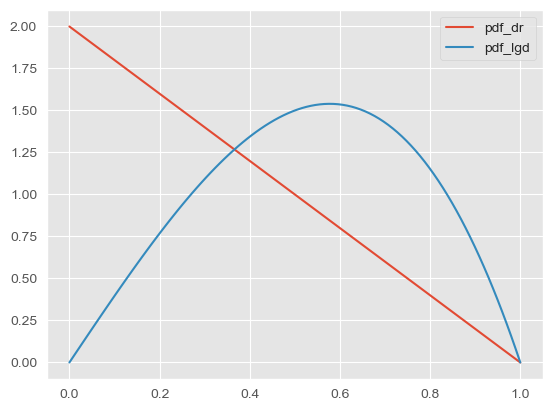

In [22]:
#plot pdf and pdf_lgd for dr from 0 to 1 and lgd from 0 to 1
dr = np.linspace(0,1,100)
lgd = np.linspace(0,1,100)
plt.plot(dr, pdf(dr))
plt.plot(lgd, pdf_lgd(lgd))
plt.legend(['pdf_dr', 'pdf_lgd'])
plt.show()

# Q2

In [23]:
def pdf_loss(loss):
    return ((4/3)*(loss**(-1/3)-loss**(1/3)))

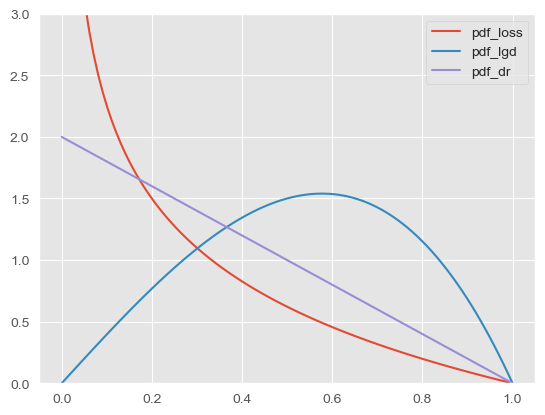

In [24]:
#plot pdf, pdf_lgd and pdf_loss for loss from 0 to 1, limit the y axis to 0 to 3
loss = np.linspace(0,1,100)
plt.plot(loss, pdf_loss(loss))
plt.plot(lgd, pdf_lgd(lgd))
plt.plot(dr, pdf(dr))
plt.legend(['pdf_loss', 'pdf_lgd', 'pdf_dr'])
plt.ylim(0,3)
plt.show()

In [37]:
#intergrate pdf_loss from 0 to 1 to get the expected loss. use scipy integrate
from scipy.integrate import quad
#explected loss is intergral of loss*pdf_loss from 0 to 1
def Expected_Loss():
    return quad(lambda x: x*pdf_loss(x), 0, 1)[0]

#LGD is integral of lgd*pdf_lgd from 0 to 1
def c_Loss_Given_default():
    return quad(lambda x: x*pdf_lgd(x), 0, 1)[0]

def Default_rate():
    return quad(lambda x: x*pdf(x), 0, 1)[0]


EL = Expected_Loss()
PD = Default_rate()
CLGD = c_Loss_Given_default()

In [38]:
print ('Expected Loss is: ', round(EL,3))
print ('Expected Loss Given Default is: ', round(EL/PD,3))
print ('Conditional Expected Loss Given Default is: ', round(CLGD,3))

Expected Loss is:  0.229
Expected Loss Given Default is:  0.686
Conditional Expected Loss Given Default is:  0.533


# Q4

In [27]:
from scipy.stats import norm
pd1, rho1 = 0.06, 0.06
pd2, rho2 = 0.03, 0.20

# q at which cPD1 = cPD2
numerator = (norm.ppf(pd1)/np.sqrt(1-rho1) - norm.ppf(pd2)/np.sqrt(1-rho2))
denominator = (np.sqrt(rho2)/np.sqrt(1-rho2) - np.sqrt(rho1)/np.sqrt(1-rho1))
q = norm.cdf(numerator/denominator)

print(f"q = {q:.2f}")

q = 0.98


In [28]:
def inv_cdf(pd, q, rho):
    return norm.cdf((norm.ppf(pd) + np.sqrt(rho)*norm.ppf(q))/np.sqrt(1-rho))

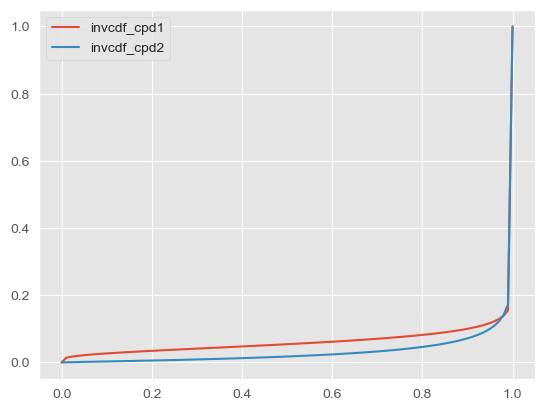

In [29]:
#plot the invcdf_cpd1 and invcdf_cpd2 for q from 0 to 1
q = np.linspace(0,1,100)
plt.plot(q, inv_cdf(pd1, q, rho1))
plt.plot(q, inv_cdf(pd2, q, rho2))
plt.legend(['invcdf_cpd1', 'invcdf_cpd2'])
plt.show()

## Problem 3

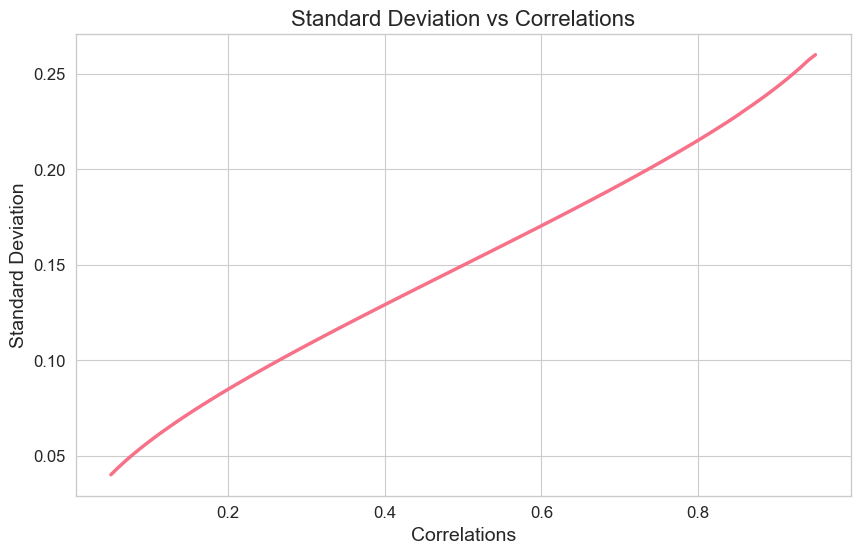

In [30]:
from scipy import integrate
import seaborn as sns

def vasicek_density(prob, correlation, val):
    constant = np.sqrt(1 - correlation) / (np.sqrt(correlation) * norm.cdf(norm.ppf(val)))
    return constant * norm.cdf((np.sqrt(1 - correlation) * norm.ppf(val) - norm.ppf(prob)) / (np.sqrt(correlation)))

def pdf_vasicek_dist(cumulative_prob, default_prob, correlation):
    factor = (np.sqrt(1 - correlation)) / (np.sqrt(correlation) * norm.pdf(norm.ppf(cumulative_prob)))
    arg = ((np.sqrt(1 - correlation) * norm.ppf(cumulative_prob)) - (norm.ppf(default_prob))) / (np.sqrt(correlation))
    return factor * norm.pdf(arg)

def first_moment_vasicek_dist(cumulative_prob, default_prob, correlation):
    return pdf_vasicek_dist(cumulative_prob, default_prob, correlation) * cumulative_prob

def second_moment_vasicek_dist(cumulative_prob, default_prob, correlation, mean_val):
    return pdf_vasicek_dist(cumulative_prob, default_prob, correlation) * ((cumulative_prob - mean_val) ** 2)

default_prob = 0.1
correlations = np.linspace(5, 95, 100) / 100

standard_deviations = []

for corr in correlations:
    mean_val, _ = integrate.quad(first_moment_vasicek_dist, 0, 1, args=(default_prob, corr))
    variance, _ = integrate.quad(second_moment_vasicek_dist, 0, 1, args=(default_prob, corr, mean_val))
    standard_deviations.append(np.sqrt(variance))

# Set the seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Plot the graph
plt.figure(figsize=(10, 6))
sns.lineplot(x=correlations, y=standard_deviations, linewidth=2.5)
plt.xlabel('Correlations', fontsize=14)
plt.ylabel('Standard Deviation', fontsize=14)
plt.title('Standard Deviation vs Correlations', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


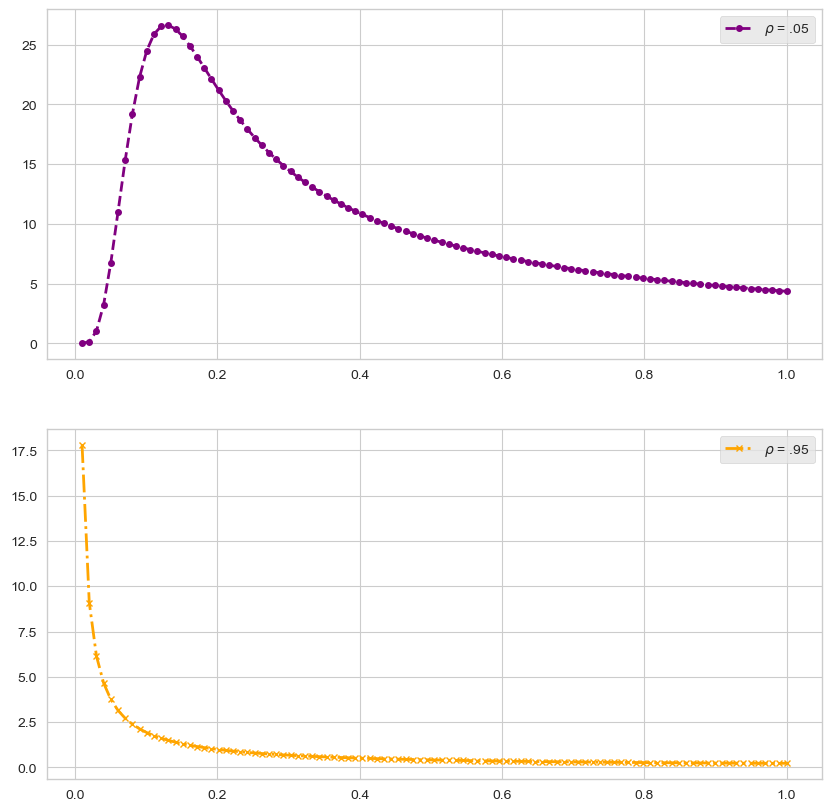

In [31]:
boundary_values = np.linspace(0, 1, num=100)
fig, subplots = plt.subplots(2, 1, figsize=(10, 10))

plt.style.use('ggplot')

subplots[0].plot(boundary_values, vasicek_density(.1, .05, boundary_values), color='purple', linestyle='--', linewidth=2, marker='o', markersize=4, label=r'$\rho$ = .05')
subplots[0].legend(loc='best')

subplots[1].plot(boundary_values, vasicek_density(.1, .95, boundary_values), color='orange', linestyle='-.', linewidth=2, marker='x', markersize=4, label=r'$\rho$ = .95')
subplots[1].legend(loc='best')

plt.show()
